Sales Summary:
        product  total_qty  revenue
0        Apples         20     50.0
1       Bananas         22     22.0
2        Grapes         18     54.0
3       Mangoes         15     60.0
4       Oranges         18     27.0
5    Pineapples          9     31.5
6  Strawberries         17     85.0


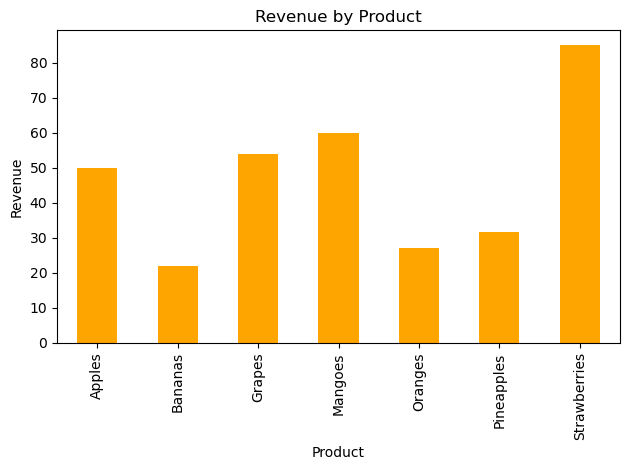

<Figure size 640x480 with 0 Axes>

In [1]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 5, 1.0),
    ('Oranges', 8, 1.5),
    ('Apples', 6, 2.5),
    ('Bananas', 7, 1.0),
    ('Grapes', 12, 3.0),
    ('Mangoes', 9, 4.0),
    ('Pineapples', 4, 3.5),
    ('Strawberries', 10, 5.0),
    ('Oranges', 10, 1.5),
    ('Mangoes', 6, 4.0),
    ('Apples', 4, 2.5),
    ('Bananas', 10, 1.0),
    ('Grapes', 6, 3.0),
    ('Pineapples', 5, 3.5),
    ('Strawberries', 7, 5.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)

print("Sales Summary:")
print(df)

df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

plt.savefig("sales_chart.png")

conn.close()
